In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from PIL import Image

In [2]:
plt.rcParams['font.family']='HYGPRM'

In [7]:
df1=pd.read_csv("MetroData/2201.csv")
df2=pd.read_csv("MetroData/2202.csv")
df3=pd.read_csv("MetroData/2203.csv")
df4=pd.read_csv("MetroData/2204.csv")
df5=pd.read_csv("MetroData/2205.csv")
df6=pd.read_csv("MetroData/2206.csv")
df7=pd.read_csv("MetroData/2207.csv")
df8=pd.read_csv("MetroData/2208.csv")

In [8]:
result1 = pd.concat([df1,df2,df3,df4,df5,df6])

In [9]:
result2 = pd.concat([df7,df8])

In [10]:
result1=result1.to_csv("./train.csv", index=False)

In [11]:
result2=result2.to_csv("./test.csv", index=False)

In [12]:
df=pd.read_csv("./train.csv")
df

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차,월,일,요일
0,2022-01-01,3호선,수서,7370,7076,14446,294,1,1,토
1,2022-01-01,3호선,학여울,461,473,934,-12,1,1,토
2,2022-01-01,3호선,대청,3224,2903,6127,321,1,1,토
3,2022-01-01,3호선,일원,3321,2803,6124,518,1,1,토
4,2022-01-01,경원선,창동,1,0,1,1,1,1,토
...,...,...,...,...,...,...,...,...,...,...
108217,2022-06-30,2호선,용답,2675,2724,5399,-49,6,30,목
108218,2022-06-30,2호선,신답,1857,2181,4038,-324,6,30,목
108219,2022-06-30,2호선,신설동,4249,3655,7904,594,6,30,목
108220,2022-06-30,2호선,도림천,1537,1630,3167,-93,6,30,목


In [13]:
df_t=pd.read_csv("./test.csv")
df_t

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차,월,일,요일
0,2022-07-01,2호선,성수,43013,47661,90674,-4648,7,1,금
1,2022-07-01,2호선,건대입구,39433,44202,83635,-4769,7,1,금
2,2022-07-01,2호선,구의(광진구청),25932,24750,50682,1182,7,1,금
3,2022-07-01,2호선,강변(동서울터미널),36241,35859,72100,382,7,1,금
4,2022-07-01,2호선,잠실나루,16254,15555,31809,699,7,1,금
...,...,...,...,...,...,...,...,...,...,...
37567,2022-08-31,중앙선,국수,901,848,1749,53,8,31,수
37568,2022-08-31,중앙선,아신,639,632,1271,7,8,31,수
37569,2022-08-31,중앙선,오빈,321,317,638,4,8,31,수
37570,2022-08-31,중앙선,양평,2850,2848,5698,2,8,31,수


In [14]:
week_mapping={"월":0, "화":1, "수":2, "목":3, "금":4, "토":5, "일":6}

In [15]:
line_mapping={"1호선":0, "2호선":1, "3호선":2, "4호선":3, "5호선":4, "6호선":5, "7호선":6, "8호선":7, "9호선":8, "9호선2~3단계":9, "경강선":10, "경부선":11, "경원선":12, 
              "경의선":13, "경인선":14, "경춘선":15, "공항철도 1호선":16, "과천선":17, "분당선":18, "수인선":19, "신림선":20, "안산선":21, "우이신설선":22,
              "일산선":23, "장항선":24, "중앙선":25}

In [16]:
combine=[df, df_t]

In [17]:
for dataset in combine:
    dataset["요일"]=dataset["요일"].map(week_mapping)
    dataset["노선"]=dataset["노선"].map(line_mapping)

In [18]:
df

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차,월,일,요일
0,2022-01-01,2,수서,7370,7076,14446,294,1,1,5
1,2022-01-01,2,학여울,461,473,934,-12,1,1,5
2,2022-01-01,2,대청,3224,2903,6127,321,1,1,5
3,2022-01-01,2,일원,3321,2803,6124,518,1,1,5
4,2022-01-01,12,창동,1,0,1,1,1,1,5
...,...,...,...,...,...,...,...,...,...,...
108217,2022-06-30,1,용답,2675,2724,5399,-49,6,30,3
108218,2022-06-30,1,신답,1857,2181,4038,-324,6,30,3
108219,2022-06-30,1,신설동,4249,3655,7904,594,6,30,3
108220,2022-06-30,1,도림천,1537,1630,3167,-93,6,30,3


In [20]:
df_t

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차,월,일,요일
0,2022-07-01,1,성수,43013,47661,90674,-4648,7,1,4
1,2022-07-01,1,건대입구,39433,44202,83635,-4769,7,1,4
2,2022-07-01,1,구의(광진구청),25932,24750,50682,1182,7,1,4
3,2022-07-01,1,강변(동서울터미널),36241,35859,72100,382,7,1,4
4,2022-07-01,1,잠실나루,16254,15555,31809,699,7,1,4
...,...,...,...,...,...,...,...,...,...,...
37567,2022-08-31,25,국수,901,848,1749,53,8,31,2
37568,2022-08-31,25,아신,639,632,1271,7,8,31,2
37569,2022-08-31,25,오빈,321,317,638,4,8,31,2
37570,2022-08-31,25,양평,2850,2848,5698,2,8,31,2


In [24]:
df=df.drop(["날짜", "역"], axis=1)

In [25]:
df

,노선,승차승객,하차승객,총 승객,승차-하차,월,일,요일
0,2,7370,7076,14446,294,1,1,5
1,2,461,473,934,-12,1,1,5
2,2,3224,2903,6127,321,1,1,5
3,2,3321,2803,6124,518,1,1,5
4,12,1,0,1,1,1,1,5
...,...,...,...,...,...,...,...,...
108217,1,2675,2724,5399,-49,6,30,3
108218,1,1857,2181,4038,-324,6,30,3
108219,1,4249,3655,7904,594,6,30,3
108220,1,1537,1630,3167,-93,6,30,3


In [26]:
df_t=df_t.drop(["날짜", "역"], axis=1)

In [27]:
df_t

,노선,승차승객,하차승객,총 승객,승차-하차,월,일,요일
0,1,43013,47661,90674,-4648,7,1,4
1,1,39433,44202,83635,-4769,7,1,4
2,1,25932,24750,50682,1182,7,1,4
3,1,36241,35859,72100,382,7,1,4
4,1,16254,15555,31809,699,7,1,4
...,...,...,...,...,...,...,...,...
37567,25,901,848,1749,53,8,31,2
37568,25,639,632,1271,7,8,31,2
37569,25,321,317,638,4,8,31,2
37570,25,2850,2848,5698,2,8,31,2


In [28]:
month_sum=df.groupby(["월"]).sum()
month_sum

,노선,승차승객,하차승객,총 승객,승차-하차,일,요일
월,,,,,,,
1,183740,167802022,167210066,335012088,591956,296171,56711
2,165738,142341031,141871343,284212374,469688,242392,50102
3,183330,163467773,162929899,326397672,537874,295274,53620
4,177222,184200435,183519579,367720014,680856,276574,55323
5,184136,203411199,202737710,406148909,673489,296541,54302
6,183983,191408080,190698164,382106244,709916,281742,53948


In [29]:
test_sum=df_t.groupby(["월"]).sum()
test_sum

,노선,승차승객,하차승객,총 승객,승차-하차,일,요일
월,,,,,,,
7,190199,193573962,192844478,386418440,729484,300544,59974
8,190023,186434010,185741586,372175596,692424,300667,52691


In [30]:
month_sum=month_sum.to_csv("./train_df.csv", index=False)

In [31]:
test_sum=test_sum.to_csv("./test_df.csv", index=False)

In [32]:
train_df=pd.read_csv("./train_df.csv")
test_df=pd.read_csv("./test_df.csv")

In [33]:
train_df

,노선,승차승객,하차승객,총 승객,승차-하차,일,요일
0,183740,167802022,167210066,335012088,591956,296171,56711
1,165738,142341031,141871343,284212374,469688,242392,50102
2,183330,163467773,162929899,326397672,537874,295274,53620
3,177222,184200435,183519579,367720014,680856,276574,55323
4,184136,203411199,202737710,406148909,673489,296541,54302
5,183983,191408080,190698164,382106244,709916,281742,53948


In [34]:
test_df

,노선,승차승객,하차승객,총 승객,승차-하차,일,요일
0,190199,193573962,192844478,386418440,729484,300544,59974
1,190023,186434010,185741586,372175596,692424,300667,52691


In [36]:
pd.options.display.float_format = '{:.5f}'.format

In [37]:
train_stats=train_df.describe()
train_stats

,노선,승차승객,하차승객,총 승객,승차-하차,일,요일
count,6.00000,6.00000,6.00000,6.00000,6.00000,6.00000,6.00000
mean,179691.50000,175438423.33333,174827793.50000,350266216.83333,610629.83333,281449.00000,54001.00000
std,7329.36804,21960543.86844,21872798.30922,43833329.05742,94071.73426,20904.24405,2215.06460
min,165738.00000,142341031.00000,141871343.00000,284212374.00000,469688.00000,242392.00000,50102.00000
25%,178749.00000,164551335.25000,163999940.75000,328551276.00000,551394.50000,277866.00000,53702.00000
50%,183535.00000,176001228.50000,175364822.50000,351366051.00000,632722.50000,288508.00000,54125.00000
75%,183922.25000,189606168.75000,188903517.75000,378509686.50000,679014.25000,295946.75000,55067.75000
max,184136.00000,203411199.00000,202737710.00000,406148909.00000,709916.00000,296541.00000,56711.00000


In [38]:
train_stats.pop("총 승객")
train_stats

,노선,승차승객,하차승객,승차-하차,일,요일
count,6.00000,6.00000,6.00000,6.00000,6.00000,6.00000
mean,179691.50000,175438423.33333,174827793.50000,610629.83333,281449.00000,54001.00000
std,7329.36804,21960543.86844,21872798.30922,94071.73426,20904.24405,2215.06460
min,165738.00000,142341031.00000,141871343.00000,469688.00000,242392.00000,50102.00000
25%,178749.00000,164551335.25000,163999940.75000,551394.50000,277866.00000,53702.00000
50%,183535.00000,176001228.50000,175364822.50000,632722.50000,288508.00000,54125.00000
75%,183922.25000,189606168.75000,188903517.75000,679014.25000,295946.75000,55067.75000
max,184136.00000,203411199.00000,202737710.00000,709916.00000,296541.00000,56711.00000


In [39]:
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
노선,6.00000,179691.50000,7329.36804,165738.00000,178749.00000,183535.00000,183922.25000,184136.00000
승차승객,6.00000,175438423.33333,21960543.86844,142341031.00000,164551335.25000,176001228.50000,189606168.75000,203411199.00000
하차승객,6.00000,174827793.50000,21872798.30922,141871343.00000,163999940.75000,175364822.50000,188903517.75000,202737710.00000
승차-하차,6.00000,610629.83333,94071.73426,469688.00000,551394.50000,632722.50000,679014.25000,709916.00000
일,6.00000,281449.00000,20904.24405,242392.00000,277866.00000,288508.00000,295946.75000,296541.00000
요일,6.00000,54001.00000,2215.06460,50102.00000,53702.00000,54125.00000,55067.75000,56711.00000


In [40]:
train_labels=train_df.pop("총 승객")
test_labels=test_df.pop("총 승객")

In [41]:
train_labels

0    335012088
1    284212374
2    326397672
3    367720014
4    406148909
5    382106244
Name: 총 승객, dtype: int64

In [42]:
def norm(x):
    return(x-train_stats["mean"])/train_stats["std"]
normed_train_df=norm(train_df)
normed_test_df=norm(test_df)

In [43]:
normed_train_df.tail()

,노선,승차승객,하차승객,승차-하차,일,요일
1,-1.90378,-1.50713,-1.50673,-1.49824,-1.86838,-1.76022
2,0.49643,-0.54510,-0.54396,-0.77341,0.66135,-0.17200
3,-0.33693,0.39899,0.39738,0.74652,-0.23321,0.59682
4,0.60640,1.27377,1.27601,0.66820,0.72196,0.13589
5,0.58552,0.72720,0.72558,1.05543,0.01402,-0.02393


In [44]:
normed_test_df.head()

,노선,승차승객,하차승객,승차-하차,일,요일
0,1.43362,0.82582,0.82370,1.26344,0.91345,2.69654
1,1.40960,0.50070,0.49897,0.86949,0.91933,-0.59140


In [45]:
train_df.keys()

Index(['노선', '승차승객', '하차승객', '승차-하차', '일', '요일'], dtype='object')

In [46]:
len(train_df.keys())

6

In [47]:
# 모델 만들기 - mae(평균 절대 오차), mse(평균 제곱 오차)
def build_model():
    model=keras.Sequential([
        layers.Dense(64, input_shape=[len(train_df.keys())], activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    # 오답 처리 알고리즘 - 바로 밑
    optimizer=tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss="mse", optimizer=optimizer, metrics=["mae", "mse"])
    return model

In [48]:
# 모델 확인
model=build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 모델 훈련
# 1000번 - 훈련 단위 1번을 에포크라고 함 에포크를 1000번 반복
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch%100==0:
            print("")
        print('.', end="")
EPOCHS=1000
model=build_model()
history=model.fit(
    normed_train_df, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[PrintDot()]
)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [51]:
hist=pd.DataFrame(history.history)
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse
995,108687583399116800.00000,328330304.00000,108687583399116800.00000,155480032318324736.00000,394126272.00000,155480032318324736.00000
996,108687583399116800.00000,328330304.00000,108687583399116800.00000,155480032318324736.00000,394126272.00000,155480032318324736.00000
997,108687566219247616.00000,328330304.00000,108687566219247616.00000,155480032318324736.00000,394126272.00000,155480032318324736.00000
998,108687549039378432.00000,328330272.00000,108687549039378432.00000,155480032318324736.00000,394126272.00000,155480032318324736.00000
999,108687549039378432.00000,328330272.00000,108687549039378432.00000,155480032318324736.00000,394126272.00000,155480032318324736.00000


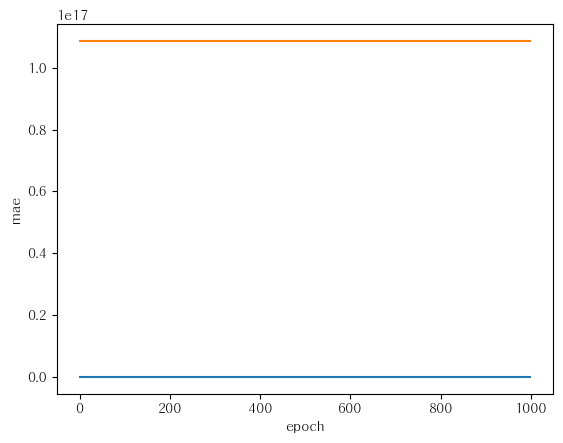

In [52]:
# 학습 1000번 가성비 
# 학습을 진행하면서 오차율을 시각화
def sns_hist(history):
    hist=pd.DataFrame(history.history)
    hist['epoch']=history.epoch
    sns.lineplot(data=hist, x="epoch", y="mae")
    sns.lineplot(data=hist, x="epoch", y="mse")
sns_hist(history)

In [54]:
# model.fit를 수정해서 검증 점수가 향상되지 않으면 자동으로 훈련을 멈추도록 하는 것으로 수정(val_loss기준)
model=build_model()
early_stop=keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
history=model.fit(
    normed_train_df, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[PrintDot(), early_stop]
)
#verbose=0 - log 안 찍는 것


...........

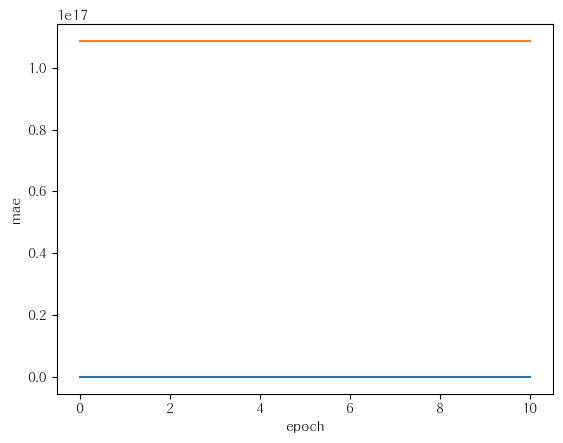

In [55]:
sns_hist(history)

In [57]:
# 성능 평가
loss, mae, mse=model.evaluate(normed_test_df, test_labels, verbose=2)
print("테스트 세트의 평균 절대 오차: ", mae, "MPG")
print("테스트 세트의 평균 절대 오차: {:.2f} MPG".format(mae))

1/1 - 0s - loss: 143916932385472512.0000 - mae: 379297024.0000 - mse: 143916932385472512.0000 - 17ms/epoch - 17ms/step
테스트 세트의 평균 절대 오차:  379297024.0 MPG
테스트 세트의 평균 절대 오차: 379297024.00 MPG


In [58]:
# 시각화해서 평가
# 예측만 하게 할 수 있음
test_predictions=model.predict(normed_test_df).flatten()
test_predictions

1/1 [==============================] - 0s 61ms/step


array([2.1628137, 1.1294965], dtype=float32)

<AxesSubplot:xlabel='총 승객'>

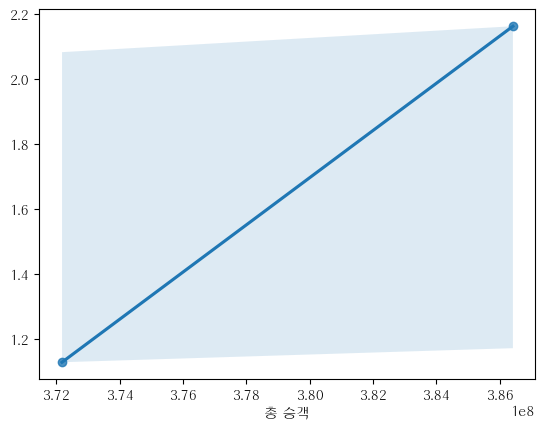

In [59]:
sns.regplot(x=test_labels, y=test_predictions)

<AxesSubplot:xlabel='총 승객'>

C:\Users\KB\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\KB\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


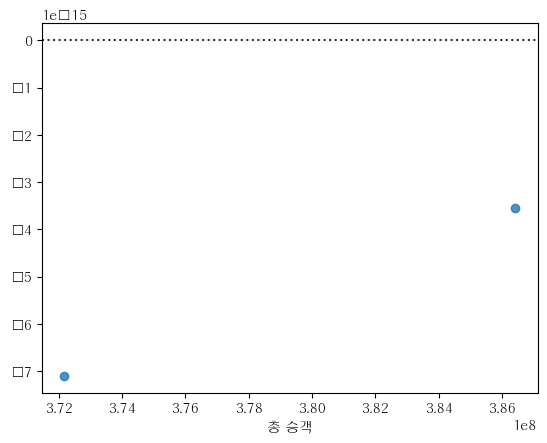

In [60]:
sns.residplot(x=test_labels, y=test_predictions)

In [61]:
# 오차 분포
error=test_predictions-test_labels
error.tail()

0   -386418437.83719
1   -372175594.87050
Name: 총 승객, dtype: float64

<AxesSubplot:>

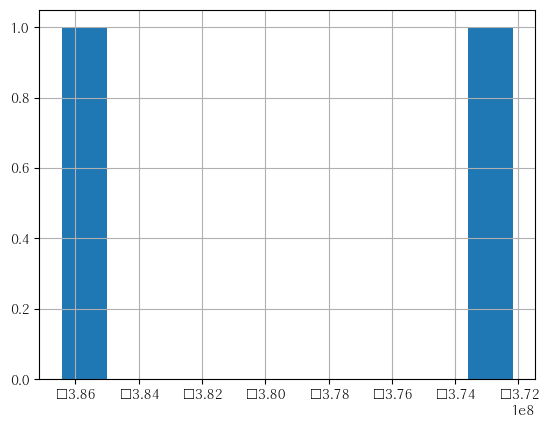

In [62]:
error.hist()

In [63]:
X_train=train_df.drop("승차승객", axis=1)
Y_train=train_df["승차승객"]
X_test=test_df.drop("승차승객", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((6, 5), (6,), (2, 5))

In [64]:
# 로지스틱 레그레이션
# 렐루, 시그모이드
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred=logreg.predict(X_test)
acc_log=round(logreg.score(X_train, Y_train)*100, 2)
acc_log

100.0

In [65]:
# 서포츠 벡터 머신
# 분류 알고리즘
# 이진 데이터를 분류할 때 가장 좋은 성능
from sklearn.svm import SVC, LinearSVC
svc=SVC()
svc.fit(X_train, Y_train)
Y_pred=svc.predict(X_test)
acc_svc=round(svc.score(X_train, Y_train)*100, 2)
acc_svc

100.0

In [66]:
test=pd.read_csv("MetroData/predict.csv")

In [67]:
test

,노선,승차승객,하차승객,총 승객,승차-하차,월,일,요일
0,22,2283,1940,4223,343,9,25,6
1,12,4697,4287,8984,410,9,25,6
2,7,3454,4242,7696,-788,9,25,6
3,2,4272,4510,8782,-238,9,25,6
4,11,5741,7522,13263,-1781,9,25,6
...,...,...,...,...,...,...,...,...
23631,12,12956,12871,25827,85,8,18,3
23632,3,25516,26182,51698,-666,8,18,3
23633,13,3026,3405,6431,-379,8,18,3
23634,5,7301,6515,13816,786,8,18,3


In [72]:
testset=test[test['월'] ==9]

In [73]:
testset

,노선,승차승객,하차승객,총 승객,승차-하차,월,일,요일
0,22,2283,1940,4223,343,9,25,6
1,12,4697,4287,8984,410,9,25,6
2,7,3454,4242,7696,-788,9,25,6
3,2,4272,4510,8782,-238,9,25,6
4,11,5741,7522,13263,-1781,9,25,6
...,...,...,...,...,...,...,...,...
15141,12,14032,13972,28004,60,9,1,3
15142,3,27034,28278,55312,-1244,9,1,3
15143,13,3641,3776,7417,-135,9,1,3
15144,5,8109,7775,15884,334,9,1,3


In [74]:
testset=testset.to_csv("./september.csv", index=False)

In [75]:
sept=pd.read_csv("./september.csv")

In [76]:
sept

,노선,승차승객,하차승객,총 승객,승차-하차,월,일,요일
0,22,2283,1940,4223,343,9,25,6
1,12,4697,4287,8984,410,9,25,6
2,7,3454,4242,7696,-788,9,25,6
3,2,4272,4510,8782,-238,9,25,6
4,11,5741,7522,13263,-1781,9,25,6
...,...,...,...,...,...,...,...,...
15141,12,14032,13972,28004,60,9,1,3
15142,3,27034,28278,55312,-1244,9,1,3
15143,13,3641,3776,7417,-135,9,1,3
15144,5,8109,7775,15884,334,9,1,3
